# Theory

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import facets_drivers

%store -r notebook_data
globals().update(notebook_data)

In [3]:
from ewoks import execute_graph

nodes = [
    {
        "id": "get_facets",
        "task_type": "class",
        "task_identifier": "facets_drivers.theory.GetFacets",
    },
    {
        "id": "get_orientation",
        "task_type": "class",
        "task_identifier": "facets_drivers.theory.GetOrientation",
    },
    {
        "id": "get_oriented_facets",
        "task_type": "class",
        "task_identifier": "facets_drivers.theory.GetOrientedFacets",
    },
]

links = [
    {
        "source": "get_facets",
        "target": "get_orientation",
        "data_mapping": [{"source_output": "vtp_facets_filepath", "target_input": "vtp_facets_filepath"},
                         {"source_output": "scratch_directory", "target_input": "scratch_directory"}],
    },
    {
        "source": "get_orientation",
        "target": "get_oriented_facets",
        "data_mapping": [{"source_output": "vtp_facets_filepath", "target_input": "vtp_facets_filepath"},
                         {"source_output": "orientation_filepath", "target_input": "orientation_filepath"},
                         {"source_output": "scratch_directory", "target_input": "scratch_directory"}],
    },
]

workflow = {"graph": {"id": "theroy"}, "nodes": nodes, "links": links}

inputs = [
    {"id": "get_facets", "name": "scratch_directory", "value": theory_directory},
    {"id": "get_facets", "name": "vti_filepath", "value": experimental_structure},
]

--- Running full facet analysis ---
Reading input file: /data/id01/inhouse/polack/scratch/ewoks_01_experiment/S37_structural_properties.vti
Processing VTI file with 7880599 points and 7762392 cells
Auto-detected iso-value: 0.500000
Extracted surface: 25532 points, 51060 triangles
Starting facet analysis...
Processing 51060 triangles with total area 363423.492985
Using splat radius: 0.200000
Creating Gaussian splat...
Creating single-point splat for measurements...
Converting to ITK format...
Applying H-minima filter...
Finding regional minima...
Labeling connected components...
Found 32 initial regions
Applying morphological watershed...
Additional watershed iteration 1/2
Additional watershed iteration 2/2
Analyzing facets...
Generating outputs...
Matching 32 hull faces to 32 facets based on normal similarity.
Generating Miller Index labels for hull...
Creating detailed OBJ file (from output0): exp.obj
Writing Original mesh with facet data to: exp_0.vtp
Writing Hull with large planar f

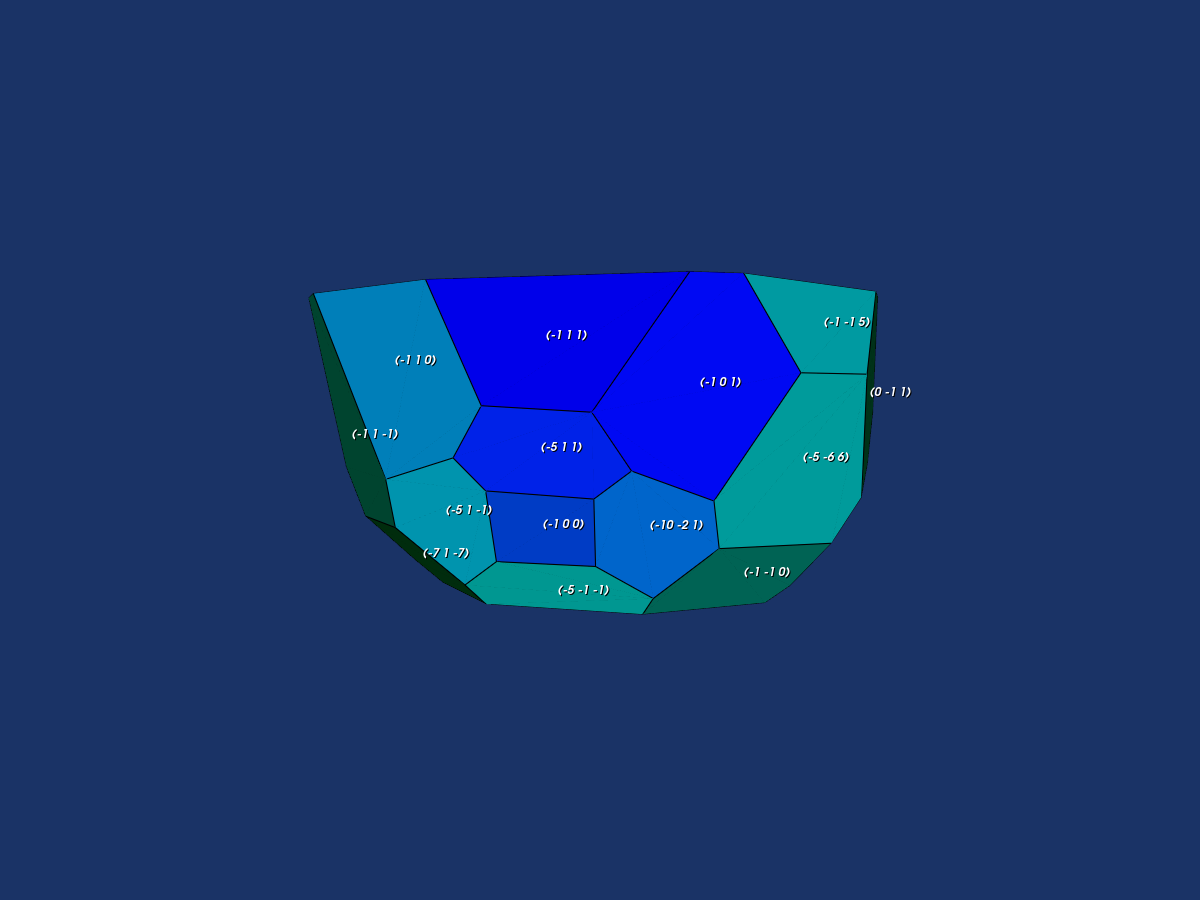

Re-labeling complete.


In [4]:
result = execute_graph(workflow, inputs=inputs)